In [5]:
### NLP_Project_9_4th_Mobile_Product_Reviews_Testing.ipynb

In [6]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
!pip install gensim

In [8]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

review = pd.read_json('/content/drive/My Drive/NLP/Cell_Phones_and_Accessories.json')

In [9]:
review.head()

Rating  Rev_verify  Review_Date  ... Review_timestamp Useful Prod_img
0       5        True   09 1, 2015  ...       1441065600   None     None
1       5        True   01 9, 2016  ...       1452297600   None     None
2       5        True  04 21, 2013  ...       1366502400   None     None
3       3        True  02 27, 2013  ...       1361923200      3     None
4       4        True  12 19, 2013  ...       1387411200   None     None

[5 rows x 11 columns]

In [10]:
review.isnull().values.any()

True

In [11]:
print(review['Review'].isnull().values.any())
print(review['Rev_summ'].isnull().values.any())
print(review['IC'].isnull().values.any())


True
True
False


In [12]:
review['Review'] = review['Review'].replace(np.nan, '', regex=True)
review['Rev_summ'] = review['Rev_summ'].replace(np.nan, '', regex=True)
print(review['Review'].isnull().values.any())
print(review['Rev_summ'].isnull().values.any())

False
False


In [13]:
review2 = review.copy()
review_combine = review2[['IC','Review','Rev_summ']] 

In [14]:
review_combine.head(2)

IC  ...              Rev_summ
0  B009XD5TPQ  ...  He's very happy with
1  B016MF3P3K  ...            Five Stars

[2 rows x 3 columns]

In [15]:
review_combine = review_combine.groupby('IC')['Review','Rev_summ'].agg(' '.join).reset_index()
review_combine.head(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


IC  ...                                           Rev_summ
0  7508492919  ...  I love it I didn't get the same case that's sh...
1  7532385086  ...  A waste of money! htc evo cover better than ex...

[2 rows x 3 columns]

In [16]:
# review_combine = review_combine.groupby('IC').agg({'Review':'first',
#                                'Rev_summ': ' '.join}).reset_index()

In [17]:
review_combine.shape

(48134, 3)

In [18]:
review_combine.head()

IC  ...                                           Rev_summ
0  7508492919  ...  I love it I didn't get the same case that's sh...
1  7532385086  ...  A waste of money! htc evo cover better than ex...
2  7887421268  ...  Five Stars good deal Five Stars Loved it at fi...
3  8199900164  ...           Five Stars I item didn't work Five Stars
4  8288853439  ...  GOOD BUY Galaxy S4 Charger LIAR Four Stars gre...

[5 rows x 3 columns]

In [19]:
review_combine['Review'][567]

"I like PalmOS.  I am used to it; it manages my life effectively.  My wife concurs.  We liked our Treos, but it was time to switch, and the Centro fits well in my wife's hand, particularly.  We both use text-messaging, and a Real Keyboard is a must-have; onscreen virtual keyboards just don't work for us.  The Centro keyboard, though smaller than that of our Treos, is perfectly adequate and easy to use.  In short this is an excellent phone at an unbeatable price.  I now own the successor Pre 2; I like it, but the Centro is my home-phone and I don't see that changing.\n\nI note in passing, this was a case of a company using the full range of seller order-execution and -fulfillment capabilities.  It was a smooth deal. maybe that's how long phones are lasting these days but it's not right. I only use about 250 minutes a month and have taken excellent care of it. It's always in a case when not in use and it's never been dropped. For the past few weeks the phone has gone mute a handful of ti

In [20]:
review_combine['Rev_summ'][567]

'A Really Good PalmOS phone stopped working after 1 year software crashes and no tech support'

**Join two columns (Review & Rev_summ)**

In [21]:
review_combine_final = review_combine.copy()
review_combine_final['Review_Combine'] =review_combine_final[['Review', 'Rev_summ']].apply(lambda x: ' '.join(x), axis=1)

In [22]:
review_combine_final.head()

IC  ...                                     Review_Combine
0  7508492919  ...  It is such a good case for a low price. I have...
1  7532385086  ...  I was very excited when I first got this case....
2  7887421268  ...  Good item Received this in about a weeks time....
3  8199900164  ...  thank you. Works some of the time.  The charge...
4  8288853439  ...  Great ! So far.\nI had this charger before and...

[5 rows x 4 columns]

In [23]:
review_combine_final['Review'][0]

'It is such a good case for a low price. I have it on right now and never had any problems with it besides losing about 2 stones since my purchase because I\'m rough with it. I recommend it. I didn\'t get the same case that\'s shown in the picture. The case I got had a black and gold bow. Its still cute but not what I wanted. I wanted what was in the picture. My teenage daughter LOVED this case.  It is really pretty.\n\nI only put 4 stars because it does look a little cheap looking, but what do you expect with this much bling. ;o) When you don\'t want to spend a whole lot of cash but want a great deal...this is the shop to buy from! I liked it because it was cute, but the studs fall off easily and to protect a phone this would not be recommended. Buy if you just like it for looks. It\'s very cute and the stones lasted a long time!  It really makes your phone look a lot more prettier and funnier. the hirl that wants and needs Hello Kitty products\nWas so happy that she has a collection 

In [24]:
review_combine_final['Rev_summ'][0]

"I love it I didn't get the same case that's shown in the ... Pretty! 1 Cute! Cute Bing,Bling!! love it cute but tightt Four Stars Crystal Bow case Cute Great Gift i love it Invisible case ITS ADORABLE GONNA ORDER THE REST. Love this case! BEAUTIFUL Luv luv luv sara I can't stop using this case! Bling cute Bling bling for iPhone 4S Bling no worth it Great for price so cute very sparkly Good love this phone cover!!! .... Pretty Cute! amazing Great cheap plastic Its okay 4S PHONE CASE Loves it!!! Great bow case."

In [25]:
review_combine_final['Review_Combine'][0]

'It is such a good case for a low price. I have it on right now and never had any problems with it besides losing about 2 stones since my purchase because I\'m rough with it. I recommend it. I didn\'t get the same case that\'s shown in the picture. The case I got had a black and gold bow. Its still cute but not what I wanted. I wanted what was in the picture. My teenage daughter LOVED this case.  It is really pretty.\n\nI only put 4 stars because it does look a little cheap looking, but what do you expect with this much bling. ;o) When you don\'t want to spend a whole lot of cash but want a great deal...this is the shop to buy from! I liked it because it was cute, but the studs fall off easily and to protect a phone this would not be recommended. Buy if you just like it for looks. It\'s very cute and the stones lasted a long time!  It really makes your phone look a lot more prettier and funnier. the hirl that wants and needs Hello Kitty products\nWas so happy that she has a collection 

**Text Preprocessing & Tokenization**

In [26]:
import gensim
# Converts into tokens (Alternative to word_tokenize)
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer,StemmerI

In [27]:
# writing function for the entire dataset
import pandas as pd
stemmer = SnowballStemmer("english")
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

#Tokenize and Lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token)>3:
            result.append(lemmatize_stemming(token))
            
    return result

In [28]:
# Preprocessing the whole document
processed_docs = []
for doc in review_combine_final['Review_Combine']:
    processed_docs.append(preprocess(doc))

In [29]:
processed_docs

[['good',
  'case',
  'price',
  'right',
  'problem',
  'lose',
  'stone',
  'purchas',
  'rough',
  'recommend',
  'case',
  'show',
  'pictur',
  'case',
  'black',
  'gold',
  'cute',
  'want',
  'want',
  'pictur',
  'teenag',
  'daughter',
  'love',
  'case',
  'pretti',
  'star',
  'look',
  'littl',
  'cheap',
  'look',
  'expect',
  'bling',
  'want',
  'spend',
  'cash',
  'want',
  'great',
  'deal',
  'shop',
  'like',
  'cute',
  'stud',
  'fall',
  'easili',
  'protect',
  'phone',
  'recommend',
  'like',
  'look',
  'cute',
  'stone',
  'last',
  'long',
  'time',
  'make',
  'phone',
  'look',
  'prettier',
  'funnier',
  'hirl',
  'want',
  'need',
  'hello',
  'kitti',
  'product',
  'happi',
  'collect',
  'choos',
  'friend',
  'want',
  'hello',
  'kitti',
  'phone',
  'case',
  'thank',
  'seller',
  'cute',
  'love',
  'drop',
  'drop',
  'iton',
  'bathroom',
  'floor',
  'crack',
  'item',
  'cute',
  'case',
  'cute',
  'look',
  'good',
  'white',
  'iphon',

In [30]:
len(processed_docs)

48134

In [31]:
# print some tokenized and preprocessed doc.
print(processed_docs[:2])

[['good', 'case', 'price', 'right', 'problem', 'lose', 'stone', 'purchas', 'rough', 'recommend', 'case', 'show', 'pictur', 'case', 'black', 'gold', 'cute', 'want', 'want', 'pictur', 'teenag', 'daughter', 'love', 'case', 'pretti', 'star', 'look', 'littl', 'cheap', 'look', 'expect', 'bling', 'want', 'spend', 'cash', 'want', 'great', 'deal', 'shop', 'like', 'cute', 'stud', 'fall', 'easili', 'protect', 'phone', 'recommend', 'like', 'look', 'cute', 'stone', 'last', 'long', 'time', 'make', 'phone', 'look', 'prettier', 'funnier', 'hirl', 'want', 'need', 'hello', 'kitti', 'product', 'happi', 'collect', 'choos', 'friend', 'want', 'hello', 'kitti', 'phone', 'case', 'thank', 'seller', 'cute', 'love', 'drop', 'drop', 'iton', 'bathroom', 'floor', 'crack', 'item', 'cute', 'case', 'cute', 'look', 'good', 'white', 'iphon', 'pretti', 'good', 'qualiti', 'diamond', 'fall', 'drop', 'cement', 'kinda', 'hard', 'cute', 'compliment', 'happi', 'case', 'pretti', 'gir', 'look', 'problem', 'hard', 'case', 'jean',

#Feature Extraction

**Create Dictionary of tokens with words(values) and keys(Ids)**

In [32]:
# Making a dictionary cotaining words and their integer ids
dictionary = gensim.corpora.Dictionary(processed_docs)

In [33]:
print (dictionary)

Dictionary(67423 unique tokens: ['actual', 'ador', 'amaz', 'apart', 'appear']...)


In [34]:
#Lets see if dictionary created succesfully
# Printing first 20 items in dictionary
count=0
for k,v in dictionary.iteritems():
    print (k, v)
    count +=1
    if count >20:
        break

0 actual
1 ador
2 amaz
3 apart
4 appear
5 argu
6 arriv
7 attach
8 awhil
9 bag
10 bare
11 bathroom
12 beauti
13 bedazzl
14 better
15 bing
16 black
17 bling
18 brand
19 break
20 breakabl


In [35]:
#remove rare and repeatative words
dictionary.filter_extremes()

In [36]:
print (dictionary)

Dictionary(15412 unique tokens: ['actual', 'ador', 'amaz', 'apart', 'appear']...)


**Create Corpus: Term Document Frequency**

apply TFIDF BOW techniques to Doc. term Freq Matrix

In [37]:
# Applying Bag-of-Words for each document (a list of words)
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

print("Bag-of-Words of our sample document: ", bow_corpus[0])

Bag-of-Words of our sample document:  [(0, 2), (1, 1), (2, 3), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 4), (13, 1), (14, 1), (15, 1), (16, 2), (17, 8), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 3), (32, 1), (33, 1), (34, 2), (35, 1), (36, 1), (37, 1), (38, 1), (39, 7), (40, 2), (41, 4), (42, 1), (43, 1), (44, 2), (45, 25), (46, 1), (47, 1), (48, 1), (49, 5), (50, 1), (51, 3), (52, 1), (53, 2), (54, 1), (55, 2), (56, 2), (57, 1), (58, 4), (59, 1), (60, 3), (61, 1), (62, 1), (63, 4), (64, 2), (65, 1), (66, 1), (67, 1), (68, 7), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 3), (75, 1), (76, 1), (77, 2), (78, 1), (79, 3), (80, 1), (81, 2), (82, 3), (83, 1), (84, 3), (85, 1), (86, 2), (87, 1), (88, 1), (89, 8), (90, 4), (91, 2), (92, 2), (93, 2), (94, 1), (95, 1), (96, 8), (97, 1), (98, 1), (99, 2), (100, 1), (101, 1), (102, 1), (103, 2), (104, 1), (105, 1), (106, 1), 

In [38]:
#preview for first document
document_num = 0
bow_doc_x = bow_corpus[document_num]

for i in range(len(bow_doc_x)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_x[i][0], 
                                                     dictionary[bow_doc_x[i][0]],
                                                     bow_doc_x[i][1]))

Word 0 ("actual") appears 2 time.
Word 1 ("ador") appears 1 time.
Word 2 ("amaz") appears 3 time.
Word 3 ("apart") appears 1 time.
Word 4 ("appear") appears 1 time.
Word 5 ("argu") appears 1 time.
Word 6 ("arriv") appears 1 time.
Word 7 ("attach") appears 2 time.
Word 8 ("awhil") appears 1 time.
Word 9 ("bag") appears 1 time.
Word 10 ("bare") appears 1 time.
Word 11 ("bathroom") appears 1 time.
Word 12 ("beauti") appears 4 time.
Word 13 ("bedazzl") appears 1 time.
Word 14 ("better") appears 1 time.
Word 15 ("bing") appears 1 time.
Word 16 ("black") appears 2 time.
Word 17 ("bling") appears 8 time.
Word 18 ("brand") appears 1 time.
Word 19 ("break") appears 2 time.
Word 20 ("breakabl") appears 1 time.
Word 21 ("buck") appears 1 time.
Word 22 ("button") appears 1 time.
Word 23 ("buy") appears 2 time.
Word 24 ("care") appears 1 time.
Word 25 ("carri") appears 1 time.
Word 26 ("cash") appears 1 time.
Word 27 ("caus") appears 1 time.
Word 28 ("cell") appears 1 time.
Word 29 ("cement") appea

In [39]:
# Importing the libraries
from gensim import corpora, models
from pprint import pprint

In [40]:
# Creating a TF-IDF model
tfidf = models.TfidfModel(corpus = bow_corpus)

In [41]:
# Applying TF-IDF to the entire corpus
tfidf_corpus = tfidf[bow_corpus]
print("1st TD-IDF: ", tfidf_corpus[0])

1st TD-IDF:  [(0, 0.02612287350611588), (1, 0.03881786675837027), (2, 0.05328463481517937), (3, 0.022895275144274047), (4, 0.020966415398946694), (5, 0.05670042995123104), (6, 0.01625835458168152), (7, 0.04007429492062345), (8, 0.034900922843533376), (9, 0.048300593919908215), (10, 0.024471083997442026), (11, 0.044125381315863695), (12, 0.07397741377227887), (13, 0.07665184476452946), (14, 0.0094763480530909), (15, 0.06621635584622651), (16, 0.03295283444512894), (17, 0.33159906881848217), (18, 0.016986607586925922), (19, 0.023074470501179504), (20, 0.0594106553175238), (21, 0.027984997858826497), (22, 0.012191527000714311), (23, 0.015127196589878782), (24, 0.017823683699833715), (25, 0.019223786584059016), (26, 0.03391577420831945), (27, 0.020527773412698406), (28, 0.018089912046029402), (29, 0.049097439906833254), (30, 0.017313654492264165), (31, 0.039065367440935736), (32, 0.03210283348949869), (33, 0.025808328351804084), (34, 0.06834015583806902), (35, 0.03460863219829797), (36, 0.

In [42]:
# Preview TF-IDF for first document
count = 0
for doc in tfidf_corpus:
    pprint(doc)
    count += 1
    if count ==2:
        break

[(0, 0.02612287350611588),
 (1, 0.03881786675837027),
 (2, 0.05328463481517937),
 (3, 0.022895275144274047),
 (4, 0.020966415398946694),
 (5, 0.05670042995123104),
 (6, 0.01625835458168152),
 (7, 0.04007429492062345),
 (8, 0.034900922843533376),
 (9, 0.048300593919908215),
 (10, 0.024471083997442026),
 (11, 0.044125381315863695),
 (12, 0.07397741377227887),
 (13, 0.07665184476452946),
 (14, 0.0094763480530909),
 (15, 0.06621635584622651),
 (16, 0.03295283444512894),
 (17, 0.33159906881848217),
 (18, 0.016986607586925922),
 (19, 0.023074470501179504),
 (20, 0.0594106553175238),
 (21, 0.027984997858826497),
 (22, 0.012191527000714311),
 (23, 0.015127196589878782),
 (24, 0.017823683699833715),
 (25, 0.019223786584059016),
 (26, 0.03391577420831945),
 (27, 0.020527773412698406),
 (28, 0.018089912046029402),
 (29, 0.049097439906833254),
 (30, 0.017313654492264165),
 (31, 0.039065367440935736),
 (32, 0.03210283348949869),
 (33, 0.025808328351804084),
 (34, 0.06834015583806902),
 (35, 0.03460

# Modeling

In [43]:
lda_model =  gensim.models.LdaMulticore(tfidf_corpus, 
                                   num_topics = 8, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   workers = 2)

In [44]:
for idx, topic in lda_model.print_topics(num_words=20):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.038*"excelent" + 0.019*"excel" + 0.017*"producto" + 0.010*"exelent" + 0.009*"cruzerlit" + 0.009*"buen" + 0.009*"bueno" + 0.008*"magpul" + 0.007*"exel" + 0.007*"bien" + 0.005*"gracia" + 0.005*"venezuela" + 0.004*"recomendado" + 0.004*"perfecto" + 0.003*"wierd" + 0.003*"vita" + 0.003*"excellet" + 0.002*"recomiendo" + 0.002*"headrest" + 0.002*"para"


Topic: 1 
Words: 0.005*"card" + 0.005*"color" + 0.005*"drop" + 0.005*"fit" + 0.005*"wallet" + 0.004*"iphon" + 0.004*"button" + 0.004*"feel" + 0.004*"cover" + 0.004*"clip" + 0.004*"review" + 0.004*"screen" + 0.004*"slim" + 0.003*"leather" + 0.003*"belt" + 0.003*"holster" + 0.003*"edg" + 0.003*"hold" + 0.003*"grip" + 0.003*"bulki"


Topic: 2 
Words: 0.035*"cute" + 0.013*"beauti" + 0.013*"color" + 0.011*"daughter" + 0.010*"pretti" + 0.009*"bling" + 0.008*"compliment" + 0.007*"gift" + 0.007*"thank" + 0.007*"fit" + 0.007*"pictur" + 0.007*"pink" + 0.006*"glitter" + 0.006*"ador" + 0.006*"super" + 0.006*"cheap" + 0.005*"fast" + 0.

# Compute Model Perplexity and Coherence Score

'Perplexity' might not be the best measure to evaluate topic models because it doesn’t consider the context and semantic associations between words. This can be captured using 'Topic Coherence' measure.

In [45]:
## Compute Perplexity

from gensim.models import CoherenceModel

## Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print('\nPerplexity: ', lda_model.log_perplexity(tfidf_corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.364210745590212

Coherence Score:  0.5401458181272286


# Save the Model

In [46]:
# save model to disk (no need to use pickle module)
lda_model.save('lda_Multi.model')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:252: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [47]:
# load trained model from file
trained_lda_Multi =  models.LdaMulticore.load('lda_Multi.model')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:252: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [48]:
# # print all topics
# trained_lda_Multi.show_topics(num_topics=10,num_words=20)

In [49]:
# # print topics
# trained_lda_Multi.print_topic(0, topn=10)

In [50]:
# # another way
# for i in range(0, trained_lda_Multi.num_topics-1):
#     print(trained_lda_Multi.print_topic(i))

In [51]:
# # and another way, only prints top words
# for t in range(0, trained_lda_Multi.num_topics-1):
#     print('topic {}: '.format(t) + ', '.join([v[1] for v in trained_lda_Multi.show_topic(t, 20)]))

# Now Find the optimal number of topics for LDA

To find optimal number of topics is, to build many LDA models with different values of number of topics (k) and pick the one that gives the highest coherence value.

In [52]:
#texts = processed_docs
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [53]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=tfidf_corpus, texts=processed_docs, start=2, limit=40, step=6)

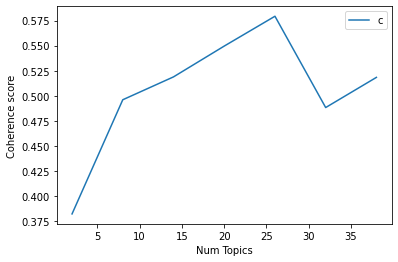

In [54]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [55]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3821
Num Topics = 8  has Coherence Value of 0.496
Num Topics = 14  has Coherence Value of 0.5188
Num Topics = 20  has Coherence Value of 0.5495
Num Topics = 26  has Coherence Value of 0.5793
Num Topics = 32  has Coherence Value of 0.4882
Num Topics = 38  has Coherence Value of 0.5183


Based on the above score, 8 seems to be the best optimum number of topics to use for the model. It has the highest coherence score before flatening out.

In [56]:
# printing the best topics now 
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=20))

[(0,
  '0.053*"band" + 0.022*"watch" + 0.010*"fitbit" + 0.009*"len" + 0.008*"wrist" '
  '+ 0.008*"armband" + 0.007*"strap" + 0.006*"water" + 0.006*"waterproof" + '
  '0.005*"gear" + 0.005*"appl" + 0.005*"blaze" + 0.005*"comfort" + '
  '0.005*"wear" + 0.004*"clasp" + 0.004*"lens" + 0.004*"leather" + 0.004*"pin" '
  '+ 0.004*"adjust" + 0.004*"color"'),
 (1,
  '0.029*"protector" + 0.026*"screen" + 0.015*"glass" + 0.013*"instal" + '
  '0.011*"bubbl" + 0.009*"edg" + 0.008*"appli" + 0.007*"temper" + 0.006*"easi" '
  '+ 0.006*"crack" + 0.005*"shield" + 0.005*"dust" + 0.005*"clean" + '
  '0.004*"watch" + 0.004*"instruct" + 0.004*"review" + 0.004*"film" + '
  '0.004*"scratch" + 0.003*"clear" + 0.003*"cover"'),
 (2,
  '0.023*"charg" + 0.015*"cabl" + 0.015*"charger" + 0.009*"batteri" + '
  '0.008*"mount" + 0.008*"cord" + 0.005*"devic" + 0.005*"power" + 0.005*"plug" '
  '+ 0.005*"fast" + 0.004*"vent" + 0.004*"review" + 0.004*"port" + '
  '0.003*"holder" + 0.003*"bank" + 0.003*"wireless" + 0.003*"q

# Finding the dominant topic in each sentence

In [57]:
def format_topics_sentences(ldamodel=trained_lda_Multi, corpus=tfidf_corpus, texts=processed_docs):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=trained_lda_Multi, corpus=tfidf_corpus, texts=processed_docs)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Review_Keywords', 'Original review']

# Show
df_dominant_topic.head(10)

Document_No  ...                                    Original review
0            0  ...  [good, case, price, right, problem, lose, ston...
1            1  ...  [excit, case, love, color, feel, start, notic,...
2            2  ...  [good, item, receiv, week, time, nice, actual,...
3            3  ...  [thank, work, time, charger, stop, work, day, ...
4            4  ...  [great, charger, pretti, good, year, fit, phon...
5            5  ...  [fit, short, defin, recommend, price, right, g...
6            6  ...  [perfect, note, backup, charger, chage, samsun...
7            7  ...  [charger, specif, long, term, usag, plug, remo...
8            8  ...  [nice, case, print, start, fade, peel, use, bu...
9            9  ...  [final, actual, work, samsung, note, charg, fa...

[10 rows x 5 columns]

In [58]:
review_combine_final.head(2)

IC  ...                                     Review_Combine
0  7508492919  ...  It is such a good case for a low price. I have...
1  7532385086  ...  I was very excited when I first got this case....

[2 rows x 4 columns]

In [59]:
#df_dominant_topic['Original review'][0]

In [60]:
#df_dominant_topic['Review_Keywords'][0]

In [61]:
result_df = pd.concat([review_combine_final, df_dominant_topic], axis=1, join='inner')

In [62]:
result_df.head(2)

IC  ...                                    Original review
0  7508492919  ...  [good, case, price, right, problem, lose, ston...
1  7532385086  ...  [excit, case, love, color, feel, start, notic,...

[2 rows x 9 columns]

In [63]:
result_df = result_df[['IC','Review_Combine','Dominant_Topic','Topic_Perc_Contrib','Original review','Review_Keywords']] 

In [64]:
result_df.head()

IC  ...                                    Review_Keywords
0  7508492919  ...  cute, beauti, color, daughter, pretti, bling, ...
1  7532385086  ...  cute, beauti, color, daughter, pretti, bling, ...
2  7887421268  ...  card, color, drop, fit, wallet, iphon, button,...
3  8199900164  ...  charg, charger, cabl, batteri, cord, power, pl...
4  8288853439  ...  charg, charger, cabl, batteri, cord, power, pl...

[5 rows x 6 columns]

In [65]:
result_df.shape

(48134, 6)

**Find the most representative document for each topic**

In [66]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_lda = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_lda = pd.concat([sent_topics_sorteddf_lda, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_lda.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_lda.columns = ['Topic_Num', "Topic_Perc_Contrib", 'Review_Keywords', 'Original review']

# Show
sent_topics_sorteddf_lda.head()

Topic_Num  ...                                    Original review
0        0.0  ...  [great, product, fit, phone, perfect, abl, sel...
1        1.0  ...  [give, good, weight, feel, galaxi, opinion, gr...
2        2.0  ...  [okay, cute, daughter, buy, addit, case, phone...
3        3.0  ...                   [havent, look, like, look, like]
4        4.0  ...  [suck, price, caus, lot, dust, pimpl, surfac, ...

[5 rows x 4 columns]

# Make a submission

In [67]:
sent_topics_sorteddf_lda.to_csv('lda_Multi_submission.csv', index=False)